In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from tqdm import tqdm
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import f1_score

In [2]:
with open("Hilasso2_coef.pickle","rb") as fr:
    coef1 = pickle.load(fr)

In [3]:
with open("simulation_data.pickle","rb") as fr:
    simulation_data = pickle.load(fr)

In [4]:
X, y, beta, epslion = simulation_data['X'], simulation_data['y'], simulation_data['beta'], simulation_data['epslion']

In [5]:
from hi_lasso2.hi_lasso2_p2 import HiLasso2_p2

b1_mean = abs(coef1).mean(axis = 0)
importance_score = np.where(b1_mean == 0, 1e-10, b1_mean)
select_prob = importance_score / importance_score.sum()
penalty_weights = 1 / (select_prob * 100)

HiLasso2_p2_v1 = HiLasso2_p2(b1 = coef1,
                          select_prob = select_prob,
                          penalty_weights = penalty_weights,
                          vol='v1', q='auto', r=30, alpha=0.05, logistic=False, random_state=None)

HiLasso2_p2_v1.fit(X, y, sample_weight=None)

Procedure 2


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [03:40<00:00,  7.34s/it]


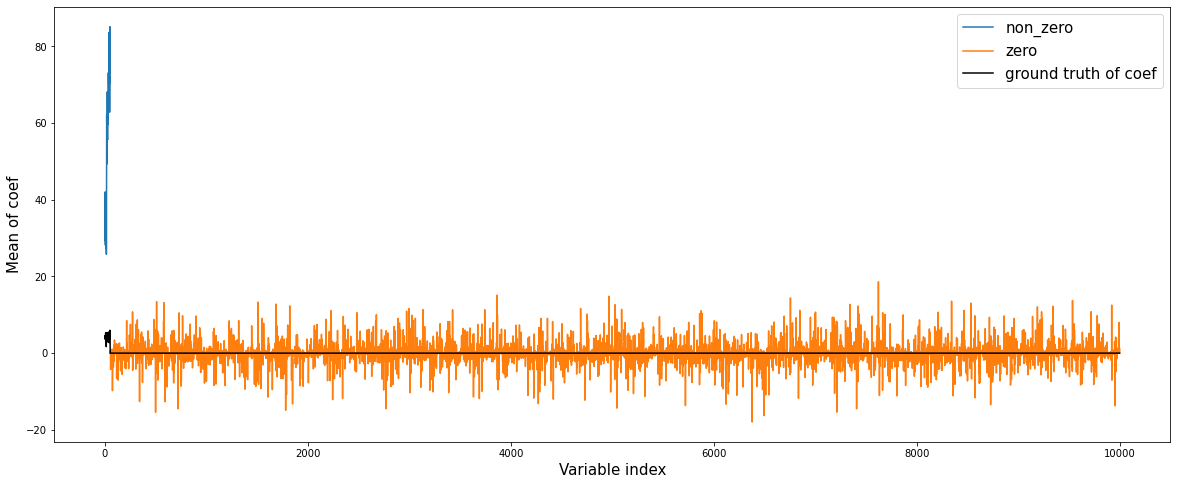

In [7]:
coef_mean = HiLasso2_p2_v1.coef_.mean(axis = 0)

plt.figure(figsize = (20,8))
plt.plot(range(50), coef_mean[:50], label = 'non_zero')
plt.plot(range(50,10000), coef_mean[50:], label = 'zero')
plt.plot(beta, label = 'ground truth of coef', c = 'black')
plt.legend(fontsize = 15)
plt.xlabel('Variable index', size = 15)
plt.ylabel('Mean of coef', size = 15)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 886.04it/s]


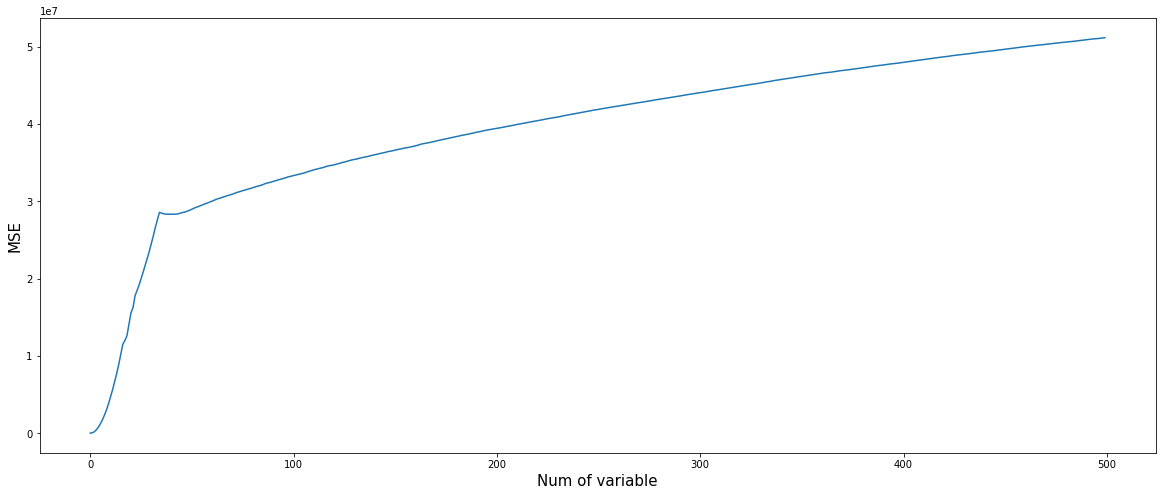

In [8]:
from sklearn.metrics import mean_squared_error as mse

temp = np.sort(abs(coef_mean))[::-1]
temp2 = abs(coef_mean)
rank = [np.where(temp == temp2[i])[0][0] for i in range(len(coef_mean))]

mse = [mse(y, (X[:, np.array(rank) <= i] @ coef_mean[np.array(rank) <= i])) for i in tqdm(range(500))]

plt.figure(figsize = (20,8))
plt.plot(mse)
plt.xlabel('Num of variable', size = 15)
plt.ylabel('MSE', size = 15)
plt.show()

In [9]:
pred = np.zeros(len(rank))
pred[np.array(rank) <= mse.index(min(mse))] = 1

confusion_matrix(pred,[1]*50+[0]*9950)

array([[9950,   49],
       [   0,    1]])

In [10]:
#f1 score
f1_score(pred,[1]*50+[0]*9950)

0.0392156862745098

In [11]:
r, p = HiLasso2_p2_v1.coef_.shape
pi = (HiLasso2_p2_v1.coef_ != 0).sum() / (r*p)
d_j = (HiLasso2_p2_v1.coef_ != 0).sum(axis = 0)
p_v = binom.sf(d_j - 1, n=r, p=pi)
pred = np.zeros(len(rank))
pred[p_v < 0.05] = 1

confusion_matrix(pred,[1]*50+[0]*9950)

array([[8216,    0],
       [1734,   50]])

In [12]:
f1_score(pred,[1]*50+[0]*9950)

0.05452562704471102

In [13]:
alpha = 5
pred = (~(np.percentile(HiLasso2_p2_v1.coef_, alpha, axis = 0) <= 0) &
        (np.percentile(HiLasso2_p2_v1.coef_, 100-alpha, axis = 0) >= 0)).astype(int)

confusion_matrix(pred,[1]*50+[0]*9950)

array([[9942,    7],
       [   8,   43]])

In [14]:
f1_score(pred,[1]*50+[0]*9950)

0.8514851485148515

In [15]:
HiLasso2_p2_v2 = HiLasso2_p2(b1 = coef1,
                             select_prob = select_prob,
                             penalty_weights = penalty_weights,
                             vol='v2', q='auto', r=30, alpha=0.05, logistic=False, random_state=None)

HiLasso2_p2_v2.fit(X, y, sample_weight=None)

Procedure 2


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [03:58<00:00,  7.95s/it]


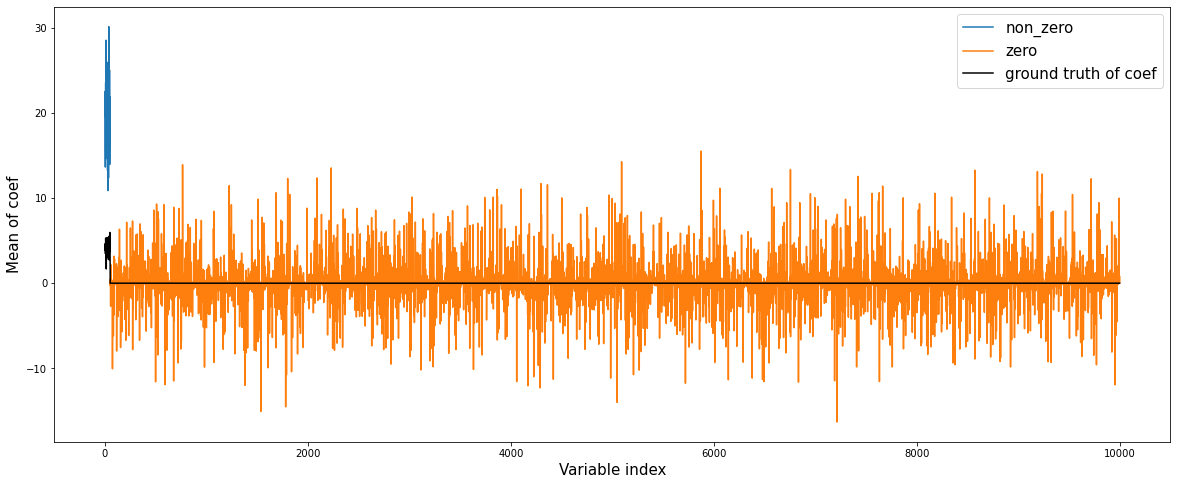

In [16]:
coef_mean = HiLasso2_p2_v2.coef_.mean(axis = 0)

plt.figure(figsize = (20,8))
plt.plot(range(50), coef_mean[:50], label = 'non_zero')
plt.plot(range(50,10000), coef_mean[50:], label = 'zero')
plt.plot(beta, label = 'ground truth of coef', c = 'black')
plt.legend(fontsize = 15)
plt.xlabel('Variable index', size = 15)
plt.ylabel('Mean of coef', size = 15)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 934.53it/s]


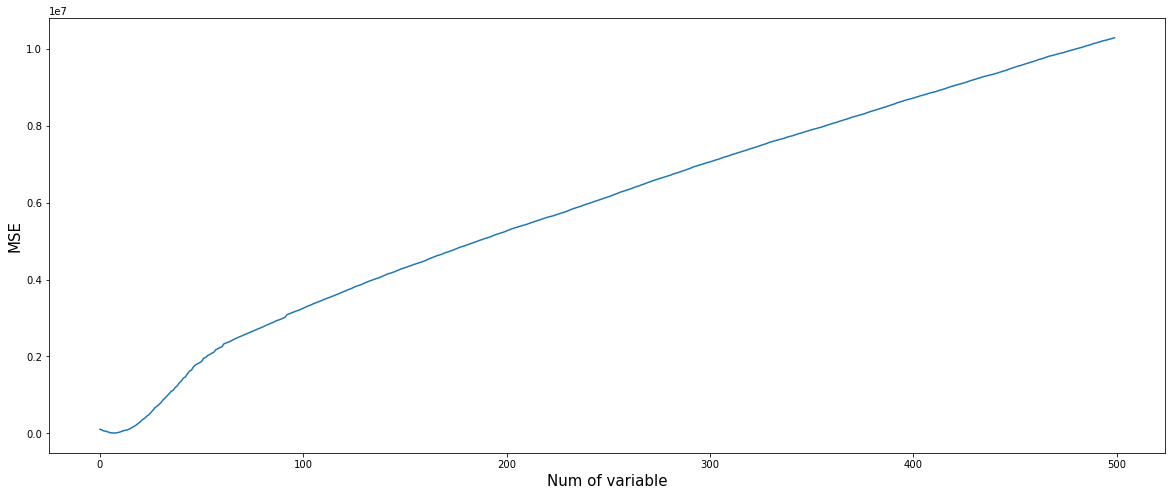

In [17]:
from sklearn.metrics import mean_squared_error as mse

temp = np.sort(abs(coef_mean))[::-1]
temp2 = abs(coef_mean)
rank = [np.where(temp == temp2[i])[0][0] for i in range(len(coef_mean))]

mse = [mse(y, (X[:, np.array(rank) <= i] @ coef_mean[np.array(rank) <= i])) for i in tqdm(range(500))]

plt.figure(figsize = (20,8))
plt.plot(mse)
plt.xlabel('Num of variable', size = 15)
plt.ylabel('MSE', size = 15)
plt.show()

In [18]:
pred = np.zeros(len(rank))
pred[np.array(rank) <= mse.index(min(mse))] = 1

confusion_matrix(pred,[1]*50+[0]*9950)

array([[9950,   42],
       [   0,    8]])

In [19]:
#f1 score
f1_score(pred,[1]*50+[0]*9950)

0.2758620689655173

In [20]:
r, p = HiLasso2_p2_v2.coef_.shape
pi = (HiLasso2_p2_v2.coef_ != 0).sum() / (r*p)
d_j = (HiLasso2_p2_v2.coef_ != 0).sum(axis = 0)
p_v = binom.sf(d_j - 1, n=r, p=pi)
pred = np.zeros(len(rank))
pred[p_v < 0.05] = 1

confusion_matrix(pred,[1]*50+[0]*9950)

array([[8126,    0],
       [1824,   50]])

In [21]:
f1_score(pred,[1]*50+[0]*9950)

0.05197505197505197

In [22]:
alpha = 5
pred = (~(np.percentile(HiLasso2_p2_v2.coef_, alpha, axis = 0) <= 0) &
        (np.percentile(HiLasso2_p2_v2.coef_, 100-alpha, axis = 0) >= 0)).astype(int)

confusion_matrix(pred,[1]*50+[0]*9950)

array([[9949,   21],
       [   1,   29]])

In [23]:
f1_score(pred,[1]*50+[0]*9950)

0.725

In [24]:
HiLasso2_p2_v3 = HiLasso2_p2(b1 = coef1,
                             select_prob = select_prob,
                             penalty_weights = penalty_weights,
                             vol='v3', q='auto', r=30, alpha=0.05, logistic=False, random_state=None)

HiLasso2_p2_v3.fit(X, y, sample_weight=None)

Procedure 2


100%|███████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:16<00:00,  7.65it/s]


/tmp/ipykernel_500856/1310471250.py:1: RuntimeWarning: Mean of empty slice
  coef_mean = np.nanmean(HiLasso2_p2_v3.coef_, axis=1)


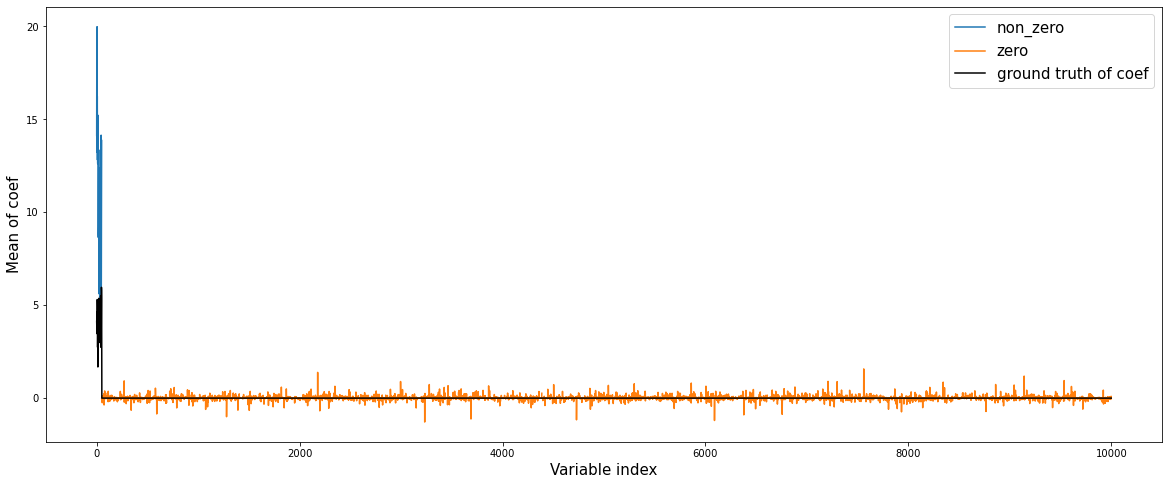

In [25]:
coef_mean = np.nanmean(HiLasso2_p2_v3.coef_, axis=1)

plt.figure(figsize = (20,8))
plt.plot(range(50), coef_mean[:50], label = 'non_zero')
plt.plot(range(50,10000), coef_mean[50:], label = 'zero')
plt.plot(beta, label = 'ground truth of coef', c = 'black')
plt.legend(fontsize = 15)
plt.xlabel('Variable index', size = 15)
plt.ylabel('Mean of coef', size = 15)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 604.46it/s]


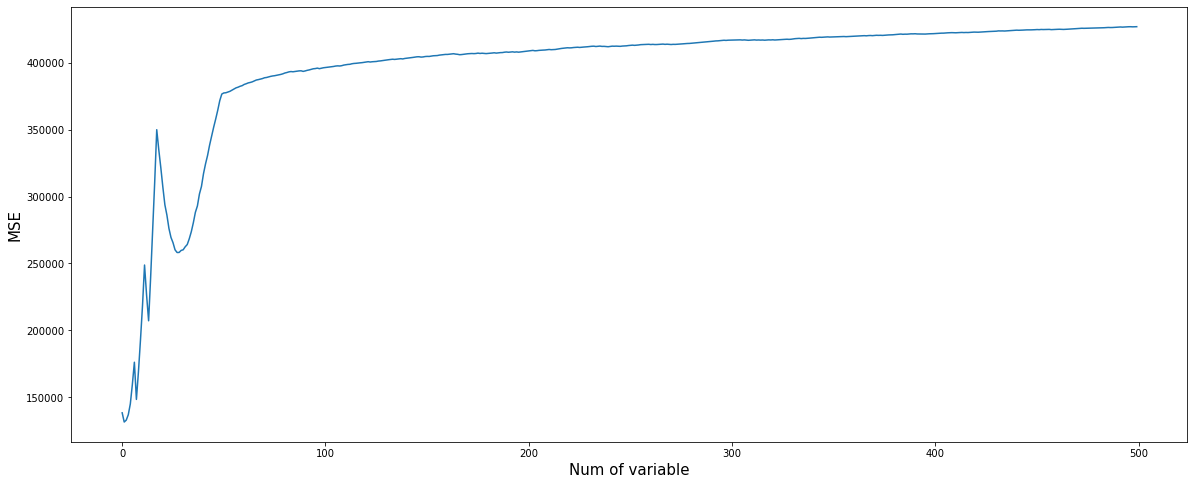

In [26]:
from sklearn.metrics import mean_squared_error as mse

coef_mean = np.nan_to_num(coef_mean)
temp = np.sort(abs(coef_mean))[::-1]
temp2 = abs(coef_mean)
rank = [np.where(temp == temp2[i])[0][0] for i in range(len(coef_mean))]

mse = [mse(y, (X[:, np.array(rank) <= i] @ coef_mean[np.array(rank) <= i])) for i in tqdm(range(500))]

plt.figure(figsize = (20,8))
plt.plot(mse)
plt.xlabel('Num of variable', size = 15)
plt.ylabel('MSE', size = 15)
plt.show()

In [27]:
pred = np.zeros(len(rank))
pred[np.array(rank) <= mse.index(min(mse))] = 1

confusion_matrix(pred,[1]*50+[0]*9950)

array([[9950,   48],
       [   0,    2]])

In [28]:
#f1 score
f1_score(pred,[1]*50+[0]*9950)

0.07692307692307693

In [29]:
p, r = HiLasso2_p2_v3.coef_.shape

not_null = ~np.isnan(HiLasso2_p2_v3.coef_)
# d_j: non-zero and notnull of j-th beta
d_j = np.logical_and(not_null, HiLasso2_p2_v3.coef_ != 0).sum(axis=1)
# pi: the average of the selcetion ratio of all predictor variables in B boostrap samples.
pi = d_j.sum() / not_null.sum().sum()
p_v = binom.sf(d_j - 1, n=r, p=pi)
pred = np.zeros(len(rank))
pred[p_v < 0.05] = 1

confusion_matrix(pred,[1]*50+[0]*9950)

array([[9950,    0],
       [   0,   50]])

In [30]:
#f1 score
f1_score(pred,[1]*50+[0]*9950)

1.0